In [2]:
import numpy as np
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Description and Exploration

## Firearm Homicide & Suicide Data

Gun-related homicides have captured lots of public attention. Many anti-gun activists have claimed that a mass shooting occurs roughly once every 200 days and has become more and more frequent in recent years. We want to examine firearm homicide data and see if the anti-gun activists' claim are valid or not and if any actions can be taken to prevent such tragedies.

We collected firearm homicide data from the Center for Disease Control and Prevention (CDC, https://www.cdc.gov/), by year, state, age group, and sex. Also, we collected data of all suicide cases by the same factors. We want to aggregate these two files into one table, containing info of death counts of firearm homicides and total homicides by population, year, state, age group, and sex.

### Homicide

In [4]:
#read firearm homicide and all homicide data
df_homicide = pd.read_csv('CDC_Homicide.csv')
df_homicide_all_injury = pd.read_csv('CDC_Homicide_All_Injury.csv')

In [5]:
df_homicide.head()

,Sex,Race,State,Ethnicity,Age Group,First Year,Last Year,Cause of Death,Year,Deaths,Population,Crude Rate
0,Males,All Races,Alabama,Both,00-04 yrs,1999,2017,Homicide/Legal Intervention Firearm,1999.0,P,150513,.
1,Females,All Races,Alabama,Both,00-04 yrs,1999,2017,Homicide/Legal Intervention Firearm,1999.0,P,144427,.
2,NaN,All Races,Alabama,Both,00-04 yrs,1999,2017,Homicide/Legal Intervention Firearm,1999.0,P,294940,.
3,Males,All Races,Alabama,Both,05-09 yrs,1999,2017,Homicide/Legal Intervention Firearm,1999.0,P,161970,.
4,Females,All Races,Alabama,Both,05-09 yrs,1999,2017,Homicide/Legal Intervention Firearm,1999.0,P,153779,.


In [6]:
df_homicide_all_injury.head()

,Sex,Race,State,Ethnicity,Age Group,First Year,Last Year,Cause of Death,Year,Deaths,Population,Crude Rate
0,Males,All Races,Alabama,Both,00-04 yrs,1999,2017,Homicide/Legal Intervention Injury,1999.0,P,150513,.
1,Females,All Races,Alabama,Both,00-04 yrs,1999,2017,Homicide/Legal Intervention Injury,1999.0,P,144427,.
2,NaN,All Races,Alabama,Both,00-04 yrs,1999,2017,Homicide/Legal Intervention Injury,1999.0,16,294940,5.42
3,Males,All Races,Alabama,Both,05-09 yrs,1999,2017,Homicide/Legal Intervention Injury,1999.0,P,161970,.
4,Females,All Races,Alabama,Both,05-09 yrs,1999,2017,Homicide/Legal Intervention Injury,1999.0,P,153779,.


#### Data Understanding
We downloaded all data available from the CDC. Due to the limitation of the CDC database, we can only download the data by four keys. We chose Year, State, Age Group, and Sex. The data source is for WISQARS Fatal Injury data operated by the National Center for Health Statistics. WISQARS provides death counts and death rates for the United States and by state, county, age, race, Hispanic ethnicity, sex, leading cause of death, injury intent, and injury mechanism categories. The data is ranged from 1999 to 2017. For the homicide data, there are 52507 rows of data entry with 12 variables. Each row represents total death count result of homicide/legal intervention due to firearms by year, sex, age group, and state. 

The first row represents the death count of males of 0-4yrs old in Alabama. The second row represents the death count of females of 0-4yrs old in Alabama. The third row represents the total death count for 0-4yrs old in Alabama. 

Some of the important variables are the following:
<ol>
<li><b>Sex:</b> Sex of the deceased.</li> 
<li><b>State:</b> State of the death.</li>
<li><b>Age Group:</b> Age group of the deceased group together by 5 years (0-4 yrs, 5-9 yrs, ...80-84 yrs, 85+ yrs).</li>
<li><b>Year:</b> Year of incidents from 1999-2017.</li>
<li><b>Population:</b> Population by state.</li>
<li><b>Crude Rate:</b> Number of death per 100,000 people.</li>
</ol>

#### Data Preparation
<ul>
    <li>We dropped columns with only one value: Race, Ethnicity, First Year, Last Year and Cause of Death.</li>
    <li>The dataset contained a sum row of both genders after every two rows, so we dropped it.</li>
    <li>The number of death was denoted as 'P' if it was zero, so we replaced it.</li>
    <li>The Crude Rate was denoted as '.' if it was zero, so we replaced as well.</li>
    <li>We created new variables: HF stands for homicide firearm, HI stands for homicide injury, SF stands for suicide firearm, SI stands for suicide injury.</li>
</ul>

In [7]:
df_homicide.isna().sum()

Sex               17529
Race                  0
State                 1
Ethnicity             0
Age Group             0
First Year            0
Last Year             0
Cause of Death        0
Year                  1
Deaths                0
Population            0
Crude Rate            0
dtype: int64

In [8]:
df_homicide = df_homicide[df_homicide.isna() == False]
df_homicide.drop(columns=['Race','Ethnicity','First Year','Last Year','Cause of Death'],inplace=True)
df_homicide = df_homicide[df_homicide.isna() == False]
df_homicide['Crude Rate'].replace('.',0,inplace=True)
df_homicide.Deaths.replace('P',0,inplace=True)
df_homicide['Crude Rate'] = df_homicide['Crude Rate'].astype(float)

The dataset of all homicides followed the same pattern. Thus we cleaned it in the same manner. One thing to notice is that since Population is duplicate in both datasets, we dropped the one in this dataset.

In [9]:
df_homicide_all_injury.isna().sum()

Sex               17612
Race                  0
State                 1
Ethnicity             0
Age Group             0
First Year            0
Last Year             0
Cause of Death        0
Year                  1
Deaths                0
Population            0
Crude Rate            0
dtype: int64

In [10]:
df_homicide_all_injury = df_homicide_all_injury[df_homicide_all_injury.isna() == False]
df_homicide_all_injury.drop(['Race','Ethnicity','First Year','Last Year','Cause of Death','Population'],axis=1,inplace=True)
df_homicide_all_injury['Crude Rate'].replace('.',0,inplace=True)
df_homicide_all_injury.Deaths.replace('P',0,inplace=True)
df_homicide_all_injury['Crude Rate'] = df_homicide_all_injury['Crude Rate'].astype(float)

In [11]:
#check
df_homicide.head()

,Sex,State,Age Group,Year,Deaths,Population,Crude Rate
0,Males,Alabama,00-04 yrs,1999.0,0,150513,0.0
1,Females,Alabama,00-04 yrs,1999.0,0,144427,0.0
2,NaN,Alabama,00-04 yrs,1999.0,0,294940,0.0
3,Males,Alabama,05-09 yrs,1999.0,0,161970,0.0
4,Females,Alabama,05-09 yrs,1999.0,0,153779,0.0


In [12]:
#check
df_homicide_all_injury.head()

,Sex,State,Age Group,Year,Deaths,Crude Rate
0,Males,Alabama,00-04 yrs,1999.0,0,0.00
1,Females,Alabama,00-04 yrs,1999.0,0,0.00
2,NaN,Alabama,00-04 yrs,1999.0,16,5.42
3,Males,Alabama,05-09 yrs,1999.0,0,0.00
4,Females,Alabama,05-09 yrs,1999.0,0,0.00


We merged both datasets on keys: Year, State, Age Group, and Sex. As we only wanted to keep records with data from both tables, we used inner join.

In [13]:
df_fu = df_homicide.merge(df_homicide_all_injury, left_on=['Sex','State','Age Group','Year'],right_on=['Sex','State','Age Group','Year'],how='inner')

In [14]:
df_fu.head()

,Sex,State,Age Group,Year,Deaths_x,Population,Crude Rate_x,Deaths_y,Crude Rate_y
0,Males,Alabama,00-04 yrs,1999.0,0,150513,0.0,0,0.00
1,Females,Alabama,00-04 yrs,1999.0,0,144427,0.0,0,0.00
2,NaN,Alabama,00-04 yrs,1999.0,0,294940,0.0,16,5.42
3,Males,Alabama,05-09 yrs,1999.0,0,161970,0.0,0,0.00
4,Females,Alabama,05-09 yrs,1999.0,0,153779,0.0,0,0.00


In [15]:
df_fu.columns

Index(['Sex', 'State', 'Age Group', 'Year', 'Deaths_x', 'Population',
       'Crude Rate_x', 'Deaths_y', 'Crude Rate_y'],
      dtype='object')

In [16]:
#rename the columns
df_fu.rename(index=str,columns = {'Deaths_x':'Deaths HF', 'Crude Rate_x':'Crude Rate HF','Deaths_y':'Deaths HI',\
                                    'Crude Rate_y':'Crude Rate HI'},inplace=True)

### Suicide

After a rough search, we realized that there are more firearm suicides than firearm crimes. Also, people who committed death with a gun had a very slim chance to be saved. This is a sad and shocking fact as when we talked about gun violence, we always associated it with mass shootings or other crimes, not with hurting or killing people themselves. Thus, we would like to explore the data of firearm suicide and see if there are any actions to take from the findings. We collected firearm suicide data from the same database using the same filter. We want to aggregate these two files into one table, containing info of death counts of firearm suicides and total suicides by population, year, state, age group, and sex.

In [17]:
#read firearm suicide and all suicide data
df_suicide = pd.read_csv('CDC_Suicide.csv')
df_all_suicide = pd.read_csv('CDC_Suicide_All_Injury.csv')

In [18]:
#check
df_suicide.head()

,Sex,Race,State,Ethnicity,Age Group,First Year,Last Year,Cause of Death,Year,Deaths,Population,Crude Rate
0,Males,All Races,Alabama,Both,00-04 yrs,1999,2017,Suicide Firearm,1999.0,P,150513,.
1,Females,All Races,Alabama,Both,00-04 yrs,1999,2017,Suicide Firearm,1999.0,P,144427,.
2,NaN,All Races,Alabama,Both,00-04 yrs,1999,2017,Suicide Firearm,1999.0,P,294940,.
3,Males,All Races,Alabama,Both,05-09 yrs,1999,2017,Suicide Firearm,1999.0,P,161970,.
4,Females,All Races,Alabama,Both,05-09 yrs,1999,2017,Suicide Firearm,1999.0,P,153779,.


In [19]:
#check
df_all_suicide.head()

,Sex,Race,State,Ethnicity,Age Group,First Year,Last Year,Cause of Death,Year,Deaths,Population,Crude Rate
0,Males,All Races,Alabama,Both,00-04 yrs,1999,2017,Suicide Injury,1999.0,P,150513,.
1,Females,All Races,Alabama,Both,00-04 yrs,1999,2017,Suicide Injury,1999.0,P,144427,.
2,NaN,All Races,Alabama,Both,00-04 yrs,1999,2017,Suicide Injury,1999.0,P,294940,.
3,Males,All Races,Alabama,Both,05-09 yrs,1999,2017,Suicide Injury,1999.0,P,161970,.
4,Females,All Races,Alabama,Both,05-09 yrs,1999,2017,Suicide Injury,1999.0,P,153779,.


In [20]:
df_suicide.drop(['Race','Ethnicity','First Year','Last Year','Cause of Death'],axis=1,inplace=True)
df_suicide = df_suicide[df_suicide.Sex.isna() == False]
df_suicide.Deaths.replace('P',0,inplace=True)
df_suicide['Crude Rate'].replace('.',0,inplace=True)
df_suicide['Crude Rate'] = df_suicide['Crude Rate'].astype(float)
df_suicide.Year = df_suicide.Year.astype('int')

#### Data Preparation

The dataset of all suicides followed the same pattern. Thus we cleaned it with the same manner. One thing to notice is that since Population is duplicate in both datasets, we dropped the one in this dataset.

In [21]:
df_all_suicide.drop(['Race','Ethnicity','First Year','Last Year','Cause of Death','Population'],axis=1,inplace=True)
df_all_suicide = df_all_suicide[df_all_suicide.Sex.isna() == False]
df_all_suicide.Deaths.replace('P',0,inplace=True)
df_all_suicide['Crude Rate'].replace('.',0,inplace=True)
df_all_suicide['Crude Rate'] = df_all_suicide['Crude Rate'].astype(float)
df_all_suicide.Year = df_all_suicide.Year.astype('int')

In [22]:
#check
df_suicide.head()

,Sex,State,Age Group,Year,Deaths,Population,Crude Rate
0,Males,Alabama,00-04 yrs,1999,0,150513,0.0
1,Females,Alabama,00-04 yrs,1999,0,144427,0.0
3,Males,Alabama,05-09 yrs,1999,0,161970,0.0
4,Females,Alabama,05-09 yrs,1999,0,153779,0.0
6,Males,Alabama,10-14 yrs,1999,0,163000,0.0


In [23]:
#check
df_all_suicide.head()

,Sex,State,Age Group,Year,Deaths,Crude Rate
0,Males,Alabama,00-04 yrs,1999,0,0.0
1,Females,Alabama,00-04 yrs,1999,0,0.0
3,Males,Alabama,05-09 yrs,1999,0,0.0
4,Females,Alabama,05-09 yrs,1999,0,0.0
6,Males,Alabama,10-14 yrs,1999,0,0.0


We merged both datasets on keys: Year, State, Age Group, and Sex. As we only wanted to keep records with data from both tables, we used inner join.

In [24]:
df_full = df_suicide.merge(df_all_suicide, left_on=['Sex','State','Age Group','Year'],right_on=['Sex','State','Age Group','Year'],how='inner')

In [25]:
df_full = df_full[df_full['Age Group'] != 'Unknown yrs']

In [26]:
df_full

,Sex,State,Age Group,Year,Deaths_x,Population,Crude Rate_x,Deaths_y,Crude Rate_y
0,Males,Alabama,00-04 yrs,1999,0,150513,0.00,0,0.00
1,Females,Alabama,00-04 yrs,1999,0,144427,0.00,0,0.00
2,Males,Alabama,05-09 yrs,1999,0,161970,0.00,0,0.00
3,Females,Alabama,05-09 yrs,1999,0,153779,0.00,0,0.00
4,Males,Alabama,10-14 yrs,1999,0,163000,0.00,0,0.00
5,Females,Alabama,10-14 yrs,1999,0,154380,0.00,0,0.00
6,Males,Alabama,15-19 yrs,1999,24,166099,14.45,30,18.06
7,Females,Alabama,15-19 yrs,1999,0,161690,0.00,0,0.00
8,Males,Alabama,20-24 yrs,1999,37,151548,24.41,46,30.35
9,Females,Alabama,20-24 yrs,1999,0,154634,0.00,10,6.47


In [27]:
#rename the columns
df_full.rename(index=str,columns = {'Deaths_x':'Deaths SF', 'Crude Rate_x':'Crude Rate SF','Deaths_y':'Deaths SI',\
                                    'Crude Rate_y':'Crude Rate SI'},inplace=True)

In [28]:
df_full = df_full.merge(df_fu, left_on=['Sex','State','Age Group','Year'],right_on=['Sex','State','Age Group','Year'],how='inner')

In [29]:
#df_full.to_csv('full_dataset.csv')

Since the data structure for the homicide and suicide merged, data are the same. We can aggregate the data further with all death counts and crude rate for homicide firearm, homicide injury, suicide firearm, and suicide injury by sex, age, year, and state. 

In [30]:
df_full.drop(columns = 'Population_y',inplace=True)

In [31]:
df_full.rename(index=str, columns = {'Population_x':'Population'},inplace=True)

In [32]:
df_full.Year = df_full.Year.astype(str)
df_full[['Deaths SF','Deaths SI', 'Deaths HF','Deaths HI']] = df_full[['Deaths SF','Deaths SI', 'Deaths HF','Deaths HI']].astype(int)

In [33]:
df_full.head(20)

,Sex,State,Age Group,Year,Deaths SF,Population,Crude Rate SF,Deaths SI,Crude Rate SI,Deaths HF,Crude Rate HF,Deaths HI,Crude Rate HI
0,Males,Alabama,00-04 yrs,1999,0,150513,0.00,0,0.00,0,0.00,0,0.00
1,Females,Alabama,00-04 yrs,1999,0,144427,0.00,0,0.00,0,0.00,0,0.00
2,Males,Alabama,05-09 yrs,1999,0,161970,0.00,0,0.00,0,0.00,0,0.00
3,Females,Alabama,05-09 yrs,1999,0,153779,0.00,0,0.00,0,0.00,0,0.00
4,Males,Alabama,10-14 yrs,1999,0,163000,0.00,0,0.00,0,0.00,0,0.00
5,Females,Alabama,10-14 yrs,1999,0,154380,0.00,0,0.00,0,0.00,0,0.00
6,Males,Alabama,15-19 yrs,1999,24,166099,14.45,30,18.06,30,18.06,34,20.47
7,Females,Alabama,15-19 yrs,1999,0,161690,0.00,0,0.00,0,0.00,11,6.80
8,Males,Alabama,20-24 yrs,1999,37,151548,24.41,46,30.35,48,31.67,54,35.63
9,Females,Alabama,20-24 yrs,1999,0,154634,0.00,10,6.47,0,0.00,12,7.76


In [34]:
#reorder the column
df_full = df_full[['Sex','State','Age Group','Year','Population',\
                   'Deaths SF','Crude Rate SF','Deaths SI','Crude Rate SI',\
                   'Deaths HF','Crude Rate HF','Deaths HI','Crude Rate HI']]
df_full.head()

,Sex,State,Age Group,Year,Population,Deaths SF,Crude Rate SF,Deaths SI,Crude Rate SI,Deaths HF,Crude Rate HF,Deaths HI,Crude Rate HI
0,Males,Alabama,00-04 yrs,1999,150513,0,0.0,0,0.0,0,0.0,0,0.0
1,Females,Alabama,00-04 yrs,1999,144427,0,0.0,0,0.0,0,0.0,0,0.0
2,Males,Alabama,05-09 yrs,1999,161970,0,0.0,0,0.0,0,0.0,0,0.0
3,Females,Alabama,05-09 yrs,1999,153779,0,0.0,0,0.0,0,0.0,0,0.0
4,Males,Alabama,10-14 yrs,1999,163000,0,0.0,0,0.0,0,0.0,0,0.0


In [35]:
#save to csv
df_full.to_csv('Suicide_Homicide_All.csv')

## Number of Deaths Due to Injury by Firearms

We obtained this dataset that contains the yearly number of deaths due to injury by firearms per 100,000 population (an age-adjusted rate, which accounts for the differences in population composition) in United States with all states from 1999-2017 from https://www.kff.org/other/state-indicator/firearms-death-rate-per-100000/. According to the description on the Kaiser Family Foundation website, this dataset is also obtained from the CDC WONDER Online Database. This dataset aggregated the total number of deaths caused by firearm annually in the US, with numbers in all 50 states and total nationally. The cause of death attributable to firearm mortality include accidental discharge of firearm, intentional self-harm, assault by fire, firearm discharge, undetermined intent, legal intervention involving firearm discharge, death from injury by firearms exclude deaths due to explosives and other causes indirectly related to firearms. We can explore the overall trend from 1999-2017 through this data.

In [36]:
df3 = pd.read_excel('Number of Deaths Due to Injury by Firearms.xlsx',index_col='Location')
df3.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Location,,,,,,,,,,,,,,,,,,,
United States,10.3,10.2,10.3,10.5,10.3,10.0,10.3,10.3,10.3,10.3,10.1,10.1,10.2,10.5,10.4,10.3,11.1,11.8,12.0
Alabama,17.7,17.2,16.4,16.1,16.9,14.8,16.0,16.8,17.3,17.3,17.2,16.2,16.0,17.1,17.6,16.9,19.7,21.5,22.9
Alaska,15.8,17.9,14.9,19.9,19.5,17.5,17.5,17.1,18.1,21.0,14.9,20.4,17.5,17.8,19.8,19.2,23.4,23.3,24.5
Arizona,16.3,15.6,16.0,18.0,15.4,15.9,16.1,16.3,15.4,14.4,13.5,14.6,14.7,14.1,14.1,13.5,13.8,15.2,15.8
Arkansas,14.6,15.4,15.3,16.3,15.1,14.7,15.7,15.1,15.1,15.5,16.2,14.4,16.1,16.6,16.8,16.6,17.0,17.8,20.3


In [37]:
df3.shape

(52, 19)

In [38]:
df3.isna().sum()

1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
dtype: int64

There is no missing value in this dataset.

Below is the summary statistics for number of death caused by firearm per 100,000 population each year from 1999-2017.

In [39]:
df3.describe()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.00000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,11.253846,10.884615,11.115385,11.463462,11.194231,10.753846,11.05000,10.859615,10.892308,11.136538,10.838462,11.028846,11.067308,11.453846,11.442308,11.425000,12.465385,13.044231,13.513462
std,4.411281,4.200345,4.349459,5.015976,4.634881,4.117941,4.26318,4.082784,4.363792,4.218681,3.865085,3.753865,3.905688,4.032635,4.074808,4.072619,4.693879,4.832708,5.268219
min,3.000000,2.700000,3.000000,2.800000,2.900000,3.100000,2.10000,2.400000,2.500000,3.000000,3.100000,3.200000,3.000000,3.400000,2.600000,2.600000,3.000000,3.400000,2.500000
25%,8.675000,7.950000,8.100000,8.850000,8.050000,7.800000,8.37500,8.000000,8.175000,8.500000,8.425000,8.500000,8.550000,9.075000,8.975000,9.300000,9.750000,10.575000,11.250000
50%,10.750000,10.450000,10.750000,10.950000,11.000000,10.500000,10.80000,10.700000,10.500000,10.650000,10.600000,10.800000,11.000000,11.050000,11.300000,11.400000,11.950000,12.750000,12.800000
75%,13.725000,13.325000,13.850000,14.000000,14.125000,13.100000,13.80000,13.250000,13.800000,13.850000,13.550000,14.125000,14.100000,14.650000,14.150000,14.650000,15.225000,17.175000,16.825000
max,25.500000,22.800000,26.000000,30.300000,26.000000,22.400000,23.80000,20.400000,21.600000,21.000000,18.100000,20.400000,18.900000,20.100000,19.800000,19.200000,23.400000,23.300000,24.500000


Below is the summary statistics for sum of number of death caused by firearm per 100,000 population of United States and each state from 1999-2017.

In [40]:
df3.T.describe()

Location,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,10.489474,17.452632,18.947368,15.194737,16.031579,8.589474,11.589474,5.147368,9.563158,18.578947,...,9.578947,15.357895,11.000000,11.200000,9.247368,10.831579,9.173684,14.278947,8.636842,16.168421
std,0.546600,1.947753,2.722615,1.159729,1.375198,0.829923,1.080584,0.623938,1.394916,6.372822,...,1.683442,1.013419,0.554777,1.395628,1.342621,0.600974,0.669861,1.491300,1.101116,2.508663
min,10.000000,14.800000,14.900000,13.500000,14.400000,7.400000,10.300000,4.100000,6.600000,8.900000,...,6.200000,14.200000,10.300000,9.400000,6.800000,10.100000,8.300000,12.600000,7.400000,11.000000
25%,10.250000,16.300000,17.500000,14.250000,15.100000,7.850000,10.800000,4.750000,8.800000,13.450000,...,8.800000,14.700000,10.650000,10.000000,8.150000,10.350000,8.750000,13.250000,7.950000,14.850000
50%,10.300000,17.100000,18.100000,15.400000,15.700000,8.500000,11.500000,5.100000,9.100000,20.100000,...,9.700000,15.200000,10.900000,10.700000,9.200000,10.800000,9.000000,14.100000,8.300000,16.700000
75%,10.450000,17.450000,20.150000,15.950000,16.600000,9.300000,12.100000,5.600000,10.600000,23.300000,...,10.250000,15.600000,11.150000,12.350000,10.000000,11.050000,9.500000,14.550000,8.650000,17.550000
max,12.000000,22.900000,24.500000,18.000000,20.300000,9.800000,14.300000,6.400000,12.100000,30.300000,...,13.400000,18.400000,12.400000,14.000000,11.700000,12.100000,11.100000,18.600000,11.400000,20.100000


## Next Step and Limitations of the Datasets

As of now, we have data on the death counts of homicides that are related to firearm, total death counts of homicides, death counts suicides that are related to firearm, and total death counts of suicides. We would be able to compute the percentage of homicides/suicides that are gun related. Furthermore, we would be able to analyze the difference of crude rate by age group to see which age group is more likely to be victimized by firearms, and which year the crude rate is higher. 

However, there's a clear limitation of the data, as we don't have any data on gun ownership. We would like to collect another dataset on annual gun ownership. With the gun ownership data, we would be able to see whether there's a correlation between gun ownership and suicide/homicide caused by firearms. Besides that, all three datasets are aggregated data. We do not have granular information on ethnicity, age, sex, gun type on each incident. 

# Visualizations & Discoveries

## 1. Suicide/Homicide Firearm Deaths from 1999-2017

### Total Deaths Counts for Suicide Firearm and Homicide Firearm

We are interested in the total death counts trend for suicide firearm and homicide firearm from 1999-2017. We are using the df_full data set from CDC for this visualization. The groupby.() function allows us to do so. We rename the variables to make it clear for the audience. The melt.() function transform the data frame and make the two death counts variables into one variable named "Death Type" and a value variable named "Total Death Counts". We are ready to plot the graph on the x and y axis. 

In [41]:
#Changing the numeric data from string to integer
df_full['Deaths SF'] = df_full['Deaths SF'].astype(int) 
df_full['Deaths HF'] = df_full['Deaths HF'].astype(int) 
df_full['Deaths SI'] = df_full['Deaths SI'].astype(int) 
df_full['Deaths HI'] = df_full['Deaths HI'].astype(int) 
df_full['Crude Rate SF'] = df_full['Crude Rate SF'].astype(int) 
df_full['Crude Rate HF'] = df_full['Crude Rate HF'].astype(int) 
df_full['Crude Rate SI'] = df_full['Crude Rate SI'].astype(int) 
df_full['Crude Rate HI'] = df_full['Crude Rate HI'].astype(int) 

In [42]:
groupby_yr = df_full.groupby('Year')['Deaths SF', 'Deaths HF'].sum().reset_index()

In [43]:
groupby_yr.rename(index=str,columns = {'Deaths SF':'Suicide Firearm Deaths','Deaths HF':'Homicide Firearm Deaths'},inplace=True)
groupby_yr

,Year,Suicide Firearm Deaths,Homicide Firearm Deaths
0,1999,13830,8622
1,2000,13798,8744
2,2001,13972,9319
3,2002,14304,9701
4,2003,14209,9932
5,2004,14015,9505
6,2005,14262,10275
7,2006,14257,10901
8,2007,14675,10694
9,2008,15494,10242


In [44]:
d = groupby_yr.melt('Year')
d.rename(index=str,columns = {'variable':'Death Type', 'value':'Total Death Counts'},inplace=True)
d

,Year,Death Type,Total Death Counts
0,1999,Suicide Firearm Deaths,13830
1,2000,Suicide Firearm Deaths,13798
2,2001,Suicide Firearm Deaths,13972
3,2002,Suicide Firearm Deaths,14304
4,2003,Suicide Firearm Deaths,14209
5,2004,Suicide Firearm Deaths,14015
6,2005,Suicide Firearm Deaths,14262
7,2006,Suicide Firearm Deaths,14257
8,2007,Suicide Firearm Deaths,14675
9,2008,Suicide Firearm Deaths,15494


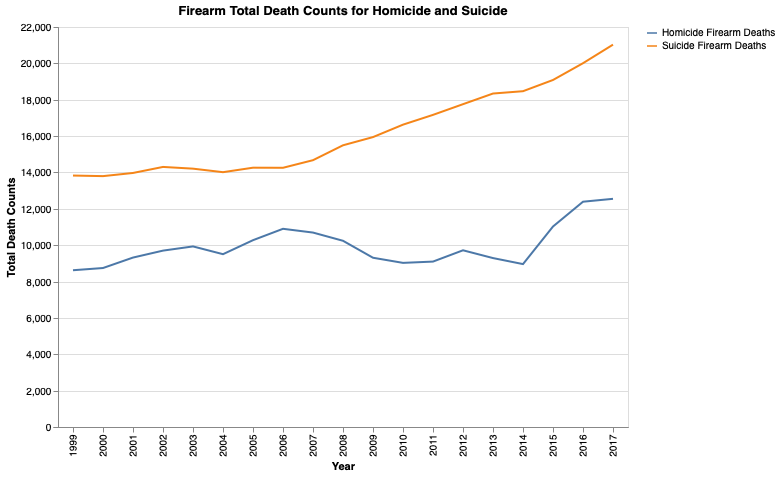

In [101]:
alt.Chart(d).mark_line().encode(
alt.X('Year:N', title='Year'),
alt.Y('Total Death Counts:Q', title = 'Total Death Counts'),
color = alt.Color('Death Type:N', legend=alt.Legend(title=None))
).properties(
    title='Firearm Total Death Counts for Homicide and Suicide',
    width=570,
    height=400
)

From the graph above, we can see that the total death counts for both homicide firearm and suicide fire arm have steadily increased from 1999 to 2017. The suicide firearm deaths almost doubled the homicide firearm deaths

### Firearm Homicide/Suicide Deaths Ratio

The total death counts for homicide and suicide firearm are both increasing. This might be due to increases in total number of suicides and homicides. Hence,we also want to analyze how many of homicide and suicide deaths are caused by firearm and its trend from 1999 to 2017. Thus, we proceeded to calculate the suicide/homicide rate - homicides/suicides that involves firearm divided by total homicides/suicides ratio. Because the data is listed by Year, State, Gender and Age Group, in order to get our target metrics, we first grouped the dataset by Year then summed Firearm Homicides, Total Homicides, Firearm Suicides and Total Suicides. We got Firearm Homicide Rate from (Firearm Homicides/Total Homicides) and Firearm Suicide Rate from (Firearm Suicides/Total Suicides).

In [46]:
death_by_year = df_full.groupby('Year')['Deaths SF','Deaths SI', 'Deaths HF','Deaths HI'].sum()
death_by_year['HF Rate'] = death_by_year['Deaths HF']/death_by_year['Deaths HI']
death_by_year['SF Rate'] = death_by_year['Deaths SF']/death_by_year['Deaths SI']

In [47]:
death_by_year.reset_index(inplace=True)

In [48]:
death_by_year

,Year,Deaths SF,Deaths SI,Deaths HF,Deaths HI,HF Rate,SF Rate
0,1999,13830,26278,8622,14020,0.614979,0.526296
1,2000,13798,26212,8744,13953,0.626675,0.526400
2,2001,13972,27553,9319,17475,0.533276,0.507095
3,2002,14304,28580,9701,14769,0.656849,0.500490
4,2003,14209,28529,9932,15003,0.662001,0.498055
5,2004,14015,29470,9505,14471,0.656831,0.475568
6,2005,14262,29683,10275,15373,0.668380,0.480477
7,2006,14257,30410,10901,15729,0.693051,0.468826
8,2007,14675,31912,10694,15490,0.690381,0.459858
9,2008,15494,33297,10242,14991,0.683210,0.465327


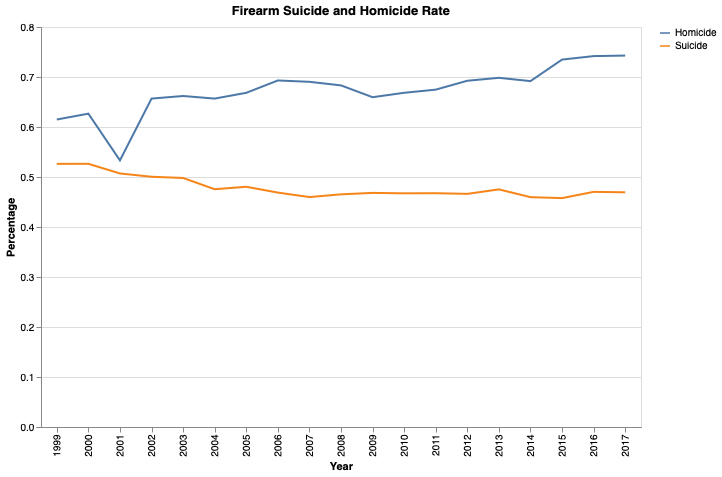

In [98]:
data = death_by_year[['Year','HF Rate','SF Rate']]
data.rename(columns = {'HF Rate':'Homicide', 'SF Rate':'Suicide'},inplace=True)
data = data.melt('Year')

alt.Chart(data).mark_line().encode(
alt.X('Year:N', title='Year'),
alt.Y('value:Q', title = 'Percentage'),
color = alt.Color('variable:N', legend=alt.Legend(title=None))
).properties(
    title='Firearm Suicide and Homicide Rate',
    width=600,
    height=400
)

Interestingly, the trends of firearm homicide and suicide death rates have opposing trends. For suicides, roughly half of them are caused by firearms. The rate has been decreasing throughout the years, meaning more deaths are caused by other reasons. However, the firearm homicide rate has been increasing from roughly 60% to around 75% over the 18 years time span. This is a dangerous sign, indicating that firearm is the main cause of homicide deaths and it has become a more prevalent cause of homicide deaths. Furthermore, We see there's a dip in the homicide firearm ratio in 2001, and we think it's related to the 911 attack, where 3000+ homicide victims from the terrorist attacks significantly brought down the firearm homicide to total homicide ratio

## 2. Firearm Suicide/Homicide Deaths by Age Group

We also want to look at which age group is more prone to suicide/homicide deaths caused by firearm and its difference between males and females. In order to do this, we first used the groupby.() function to group by age group and sex and find the sum of the 4 death counts. We decided to use two bar charts side by side to display male vs female, because it would be easier to interpret than a multi-layered line chart, and the age group serves as a categorical variable, thus bar chart is the best option here.

In [50]:
death_age = df_full.groupby(['Age Group','Sex'])['Deaths SF','Deaths SI', 'Deaths HF','Deaths HI'].sum()

In [51]:
death_age.reset_index(inplace=True)

In [52]:
death_age

,Age Group,Sex,Deaths SF,Deaths SI,Deaths HF,Deaths HI
0,00-04 yrs,Females,0,0,0,3106
1,00-04 yrs,Males,0,0,11,4764
2,05-09 yrs,Females,0,0,23,57
3,05-09 yrs,Males,0,0,0,99
4,10-14 yrs,Females,0,166,0,64
5,10-14 yrs,Males,54,1336,395,648
6,15-19 yrs,Females,136,3964,1270,2654
7,15-19 yrs,Males,11557,25119,25916,29683
8,20-24 yrs,Females,521,5880,2735,5793
9,20-24 yrs,Males,22912,44915,44617,51617


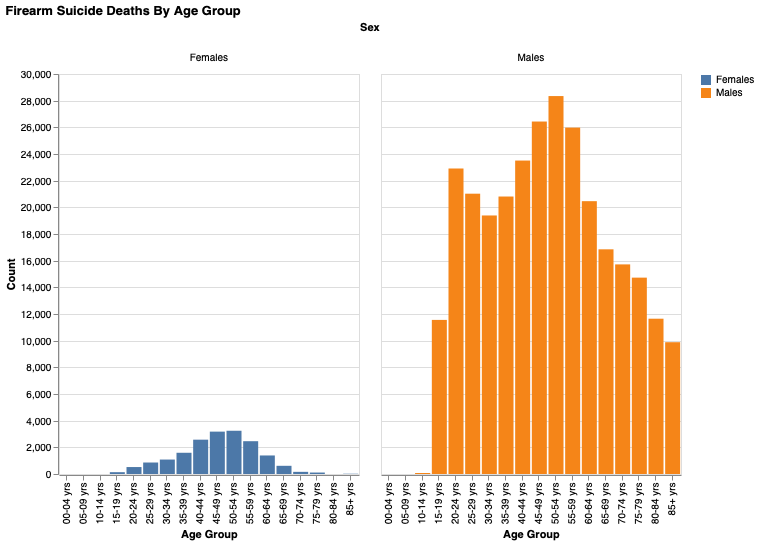

In [71]:
data = death_age[['Age Group','Sex','Deaths SF','Deaths HF']]

alt.Chart(data).mark_bar().encode(
alt.X('Age Group:N', title='Age Group'),
alt.Y('Deaths SF:Q', title = 'Count'),
color = alt.Color('Sex:N', legend=alt.Legend(title=None)),
column = 'Sex:N').properties(
    title='Firearm Suicide Deaths By Age Group',
    width=300,
    height=400
)

From this chart we can see that male is much more likely to commit suicide with firearm across all age groups. The age groups that stand out for female is 45-49 and 50-54 years old. Whereas for male, the death count first reaches a high point from age 20-24, as we believe that young males are more impulsive and often take extreme actions, in this case, committing suicide with firearm. Then similar to female, age 45-54 appears to have the most deaths, and after that there's a steadily decrease in the number of suicide death caused by firearm.

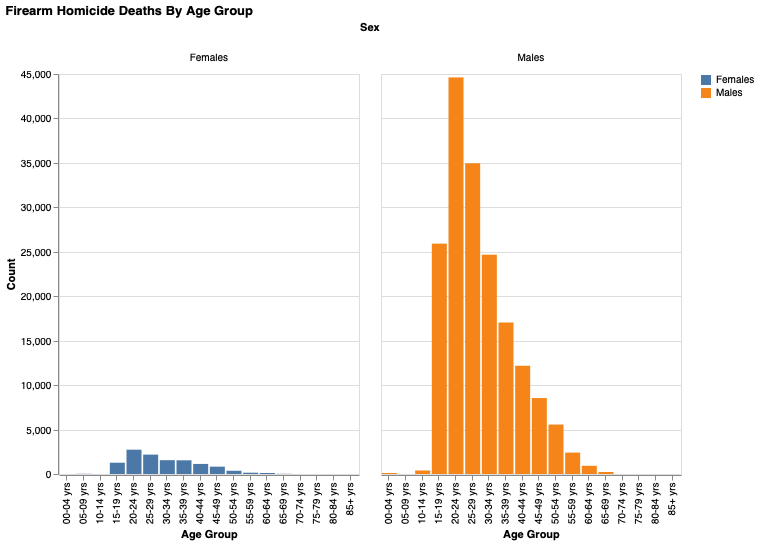

In [67]:
data = death_age[['Age Group','Sex','Deaths SF','Deaths HF']]

alt.Chart(data).mark_bar().encode(
alt.X('Age Group:N', title='Age Group'),
alt.Y('Deaths HF:Q', title = 'Count'),
color = alt.Color('Sex:N', legend=alt.Legend(title=None)),
column = 'Sex:N').properties(
    title='Firearm Homicide Deaths By Age Group',
    width=300,
    height=400
)

Then we also looked at homicide deaths caused by firearms for each age group and for male & female. The trend shifts significantly; we can see that for both female and male, early adulthood(20-29 years old) accounts for the highest death counts. Since the data consists of both homicide offenders and homicide victims, we suspect that there's a same pattern for both the offenders and victims, the homicide offending rate and the victimization rate decreases as age increases.

We may improve this graph by centering the title and making the font bigger. 

## 3. Crude Rate by States

### Average Crude Rate in States with the Strictest and Loosest Gun Laws 

In [74]:
df_full.head()

,Sex,State,Age Group,Year,Population,Deaths SF,Crude Rate SF,Deaths SI,Crude Rate SI,Deaths HF,Crude Rate HF,Deaths HI,Crude Rate HI
0,Males,Alabama,00-04 yrs,1999,150513,0,0,0,0,0,0,0,0
1,Females,Alabama,00-04 yrs,1999,144427,0,0,0,0,0,0,0,0
2,Males,Alabama,05-09 yrs,1999,161970,0,0,0,0,0,0,0,0
3,Females,Alabama,05-09 yrs,1999,153779,0,0,0,0,0,0,0,0
4,Males,Alabama,10-14 yrs,1999,163000,0,0,0,0,0,0,0,0


We would like to look at which states have more firearm suicide/homicide deaths. In our dataset, each row represents total death count or crude rate result of suicide/homicide due to firearms by year, sex, age group, and state. Crude rate is the number of deaths per 100,000 population in the area where the incident happened at that time. In order to find out the trend of crude rate in states that have the most restrictive and the loosest gun laws, we firstly discovered the top 8 states with the most restrictive and the loosest gun laws from the following references. 
<br/>The top 8 states with the most strict gun laws are California, Connecticut, Colorado, District of Columbia, Maryland, Massachusetts, New Jersey, and New York.
<br/>The top 8 states with the loosest gun laws are Arizona, Alaska, Wyoming, Vermont, Kansas, Kentucky , Mississippi, and Utah.

Reference:
<br/>https://www.cheatsheet.com/culture/these-states-have-the-most-restrictive-gun-laws-in-america.html/
<br/>https://www.cheatsheet.com/culture/states-loosest-gun-laws.html/

Then we created a new column "laws" to label these 16 states into two groups :"strict" and "loose". In order to plot the yearly crude rate trend in these two different group of states, we chose to use the annual average crude rate within each of the two groups. 

In [82]:
strict=["California","Connecticut","Colorado","District of Columbia","Maryland","Massachusetts","New Jersey",
        "New York"]
loose=["Arizona","Alaska","Wyoming","Vermont","Kansas","Kentucky","Mississippi","Utah"]

In [83]:
df2 = df_full[df_full.State.isin(["California","Connecticut","Colorado","District of Columbia","Maryland","Massachusetts","New Jersey",
        "New York","Arizona","Alaska","Wyoming","Vermont","Kansas","Kentucky","Mississippi","Utah"])]

In [84]:
df2['Laws']=(df2.State.isin(strict))*1

/Users/jiayinghe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
df2.head()

,Sex,State,Age Group,Year,Population,Deaths SF,Crude Rate SF,Deaths SI,Crude Rate SI,Deaths HF,Crude Rate HF,Deaths HI,Crude Rate HI,Laws
36,Males,Alaska,00-04 yrs,1999,24594,0,0,0,0,0,0,0,0,0
37,Females,Alaska,00-04 yrs,1999,23342,0,0,0,0,0,0,0,0,0
38,Males,Alaska,05-09 yrs,1999,28288,0,0,0,0,0,0,0,0,0
39,Females,Alaska,05-09 yrs,1999,26894,0,0,0,0,0,0,0,0,0
40,Males,Alaska,10-14 yrs,1999,28700,0,0,0,0,0,0,0,0,0


In [86]:
data3 = df2.groupby(['Year','Laws'],as_index=False)['Crude Rate SI','Crude Rate SF','Crude Rate HF','Crude Rate HI'
                                                  ].mean()

In [87]:
data3.Laws=data3.Laws.replace({1:'strict',0:'loose'})

So far we have prepared our data as following with the average Crude Rate (number of deaths per 100,000 population) for suicide incident, suicide incident with firearm, homicide incident and homicide incident with firearm each year from 1999-2017, for each group of states with strict and loose gun laws.

In [88]:
data3

,Year,Laws,Crude Rate SI,Crude Rate SF,Crude Rate HF,Crude Rate HI
0,1999,loose,7.767361,4.756944,1.284722,2.041667
1,1999,strict,7.829861,3.125000,3.569444,4.881944
2,2000,loose,8.177083,5.322917,1.284722,1.968750
3,2000,strict,7.618056,3.222222,3.204861,4.729167
4,2001,loose,7.225694,4.013889,1.347222,2.163194
5,2001,strict,7.923611,3.378472,3.743056,7.322917
6,2002,loose,9.076389,5.250000,1.250000,1.927083
7,2002,strict,7.430556,2.836806,3.954861,5.621528
8,2003,loose,9.239583,5.392361,1.177083,1.902778
9,2003,strict,7.690972,3.125000,4.048611,5.378472


a) the trend for average number of deaths per 100,000 caused by all suicide incidents from 1999-2017 for the two groups of states.

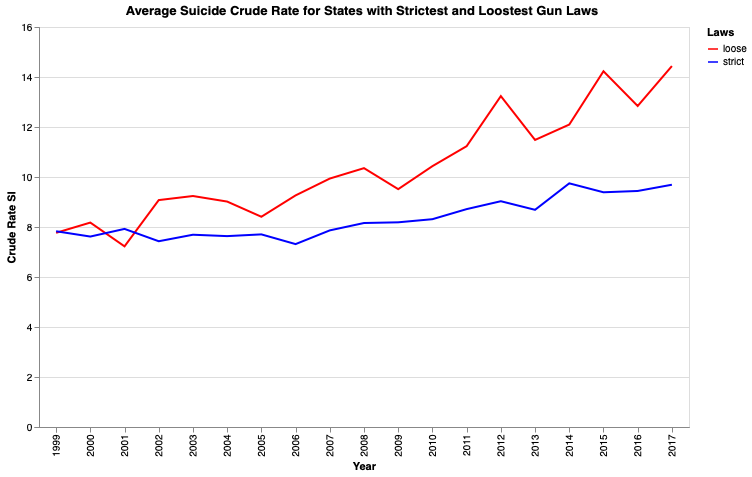

In [95]:
alt.Chart(data3).mark_line().encode(
    x='Year',
    y='Crude Rate SI',
    color=alt.Color('Laws', scale=alt.Scale(domain=['loose','strict'], range=['red','blue']))
).properties(
    title='Average Suicide Crude Rate for States with Strictest and Loostest Gun Laws ',
    width=650,
    height=400
)

b) the trend for average number of deaths per 100,000 caused by suicide incidents with firearms from 1999-2017 for the two groups of states.

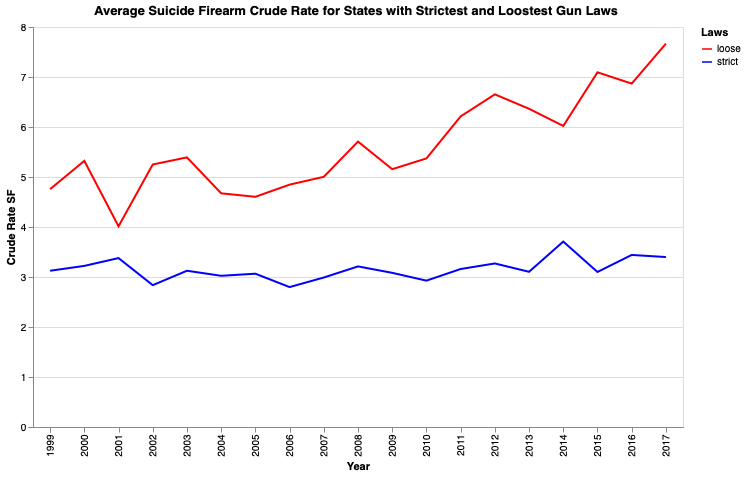

In [112]:
alt.Chart(data3).mark_line().encode(
    x='Year',
    y='Crude Rate SF',
    color=alt.Color('Laws', scale=alt.Scale(domain=['loose','strict'], range=['red','blue']))
).properties(
    title='Average Suicide Firearm Crude Rate for States with Strictest and Loostest Gun Laws ',
    width=650,
    height=400
)

c) the trend for average number of deaths per 100,000 caused by all homicide incidents from 1999-2017 for the two groups of states.

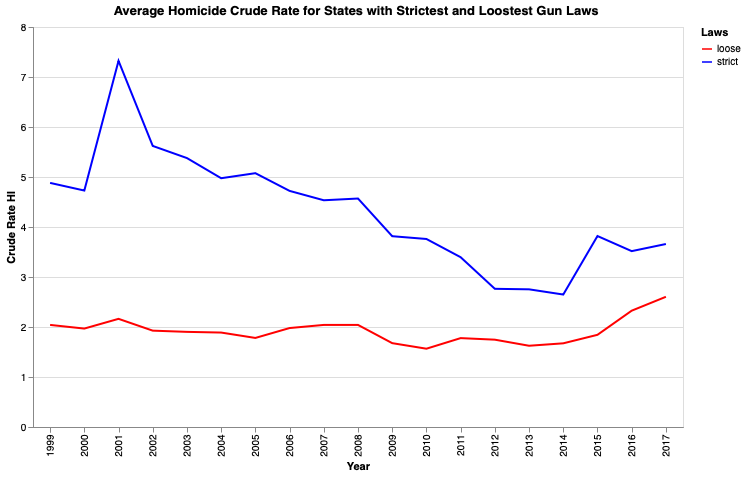

In [111]:
alt.Chart(data3).mark_line().encode(
    x='Year',
    y='Crude Rate HI',
    color=alt.Color('Laws', scale=alt.Scale(domain=['loose','strict'], range=['red','blue']))
).properties(
    title='Average Homicide Crude Rate for States with Strictest and Loostest Gun Laws ',
    width=650,
    height=400
)

d) the trend for average number of deaths per 100,000 caused by homicide incidents with firearms from 1999-2017 for the two groups of states.

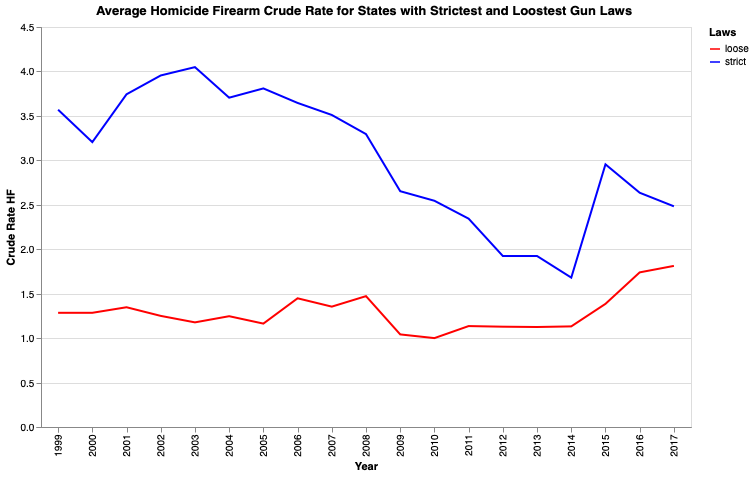

In [115]:
alt.Chart(data3).mark_line().encode(
    x='Year',
    y='Crude Rate HF',
    color=alt.Color('Laws', scale=alt.Scale(domain=['loose','strict'], range=['red','blue']))
).properties(
    title='Average Homicide Firearm Crude Rate for States with Strictest and Loostest Gun Laws ',
    width=650,
    height=400
)

As we can see from the visualizations, although both states groups have increasing trends in number of death caused by suicide, those states with loose gun laws possess an dramatic increasing trend in deaths caused by suicide with firearms, compared with the flat trend in states with restrictive gun laws. 
<br/>As for number of deaths caused by homicide incidents, deaths caused by those involved with firearms have been decreasing in the strict states while increasing in the loose states.

### Crude Rate by State Heatmap

We are curious to know if the red states are worse off than the blue states since they generally have more lenient gun policies. Taking the population size and composition into account, we will be use the age-adjusted firearm crude rats in df3 dataset also from CDC. The firearm crude rate is the number of deaths due to injury by firearms per 100,000 population. Adjusting the age is important when comparing the differences between states as death rates are affected by the population composition of a given area as well.

In [116]:
df3.columns = df3.columns.astype(str)

In [117]:
df3 = df3.reset_index()

In [118]:
df3 = df3[df3.Location != 'United States']

In [119]:
df3 = df3.rename({'Location':'state'}, axis='columns')

In order to graph the states on a map in Altair, we need to label the states with the same id in the vega dataset in Altair. We downloaded the dataset with id info (https://github.com/vega/vega/blob/master/docs/data/zipcodes.csv) and merged it with our df3 using left merge with state as a key.

In [120]:
df4 = pd.read_csv('population_engineers_hurricanes.csv')
df4 = df4[['state','id']]
#check
df4.head()

,state,id
0,Alabama,1
1,Alaska,2
2,Arizona,4
3,Arkansas,5
4,California,6


In [121]:
crude = pd.merge(df3,df4, how = 'left', on = 'state')
#check if the merge is done properly
crude.columns

Index(['state', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', 'id'],
      dtype='object')

In [122]:
crude['id'] = crude['id'].astype(str)

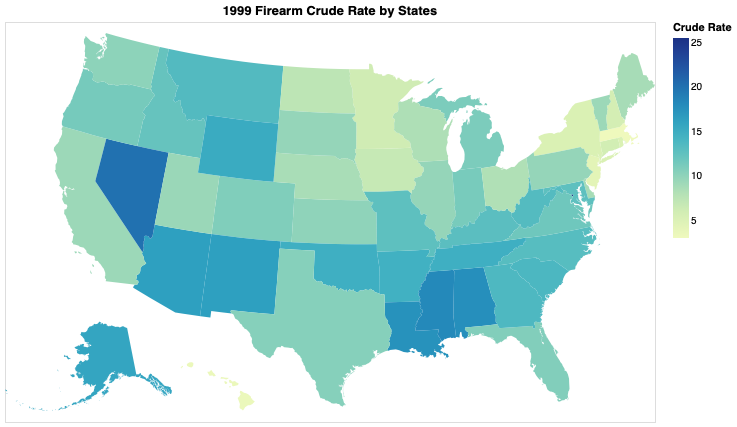

In [156]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(states).mark_geoshape().encode(
    color=alt.Color('1999:Q',
    legend=alt.Legend(title='Crude Rate'))
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(crude, 'id', ['1999'])
).project(
    type='albersUsa'
).properties(
    title='1999 Firearm Crude Rate by States',
    width=650,
    height=400
)

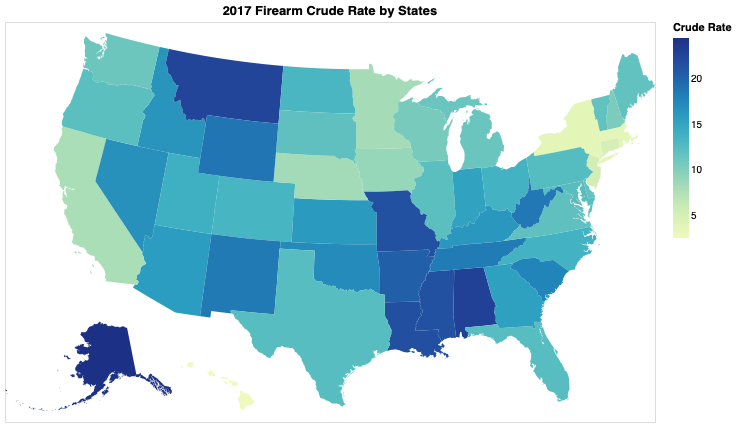

In [163]:
states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(states).mark_geoshape().encode(
    color= alt.Color('2017:Q',
    legend=alt.Legend(title='Crude Rate'))
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(crude, 'id', ['2017'])
).project(
    type='albersUsa'
).properties(
    title='2017 Firearm Crude Rate by States',
    width=650,
    height=400
)

The two graphs above shows the firearm crude rate by states in 1999 and 2017. It seems that some the fire arm crude rate have increased drastically for certain states, such as Alaska, Alabama, Missouri and Montana. Compared to the red vs. blue states in 1999(https://www.forbes.com/sites/frankminiter/2016/11/07/how-we-became-red-and-blue-america-and-what-we-must-do-about-it/#1c8e14e46bed) and 2017 (https://www.270towin.com/maps/2016-actual-electoral-map) found on Google images , it seems that our hypothesis is true: Red states are worse off than the blue states in general. Even though the total firearm death counts are higher in the blue states, after adjusting the population and age, the crude rate is much higher in the red states.  

We may want to improve the graph by adding state names and make the legend display properly. The crude rate range should be 0-25.